In [ ]:
!pip install import_ipynb
import import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn import metrics

#these libraries for searching the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/all_academic_necessities/INTERN/official_work/aqualink/room_wise_weather_data/room_wise_sensor_data.ipynb /content

In [ ]:
import room_wise_sensor_data as idf # (idf= imported dataframe)

In [ ]:
idf.merged_df.head()

parameter_name unit  parameter_id  slave_id  \
created_at                                                              
2022-03-29 10:53:54+00:00       air_temp    c             1         1   
2022-03-29 10:53:54+00:00   air_humidity    %             2         1   
2022-03-29 10:53:55+00:00       air_temp    c             1         2   
2022-03-29 10:53:55+00:00   air_humidity    %             2         2   
2022-03-29 10:53:55+00:00       air_temp    c             1         3   

                          sensor_name  room_id    room_name  device_id  value  
created_at                                                                     
2022-03-29 10:53:54+00:00        Temp        3  Right Wing           3      0  
2022-03-29 10:53:54+00:00        Temp        3  Right Wing           3      0  
2022-03-29 10:53:55+00:00        Temp        1    Left Wing          3      0  
2022-03-29 10:53:55+00:00        Temp        1    Left Wing          3      0  
2022-03-29 10:53:55+00:00        Temp        5     Top Wing          3      0

In [ ]:
idf.indexnot_df.head()

created_at parameter_name unit  parameter_id  slave_id  \
0 2022-03-29 10:53:54+00:00       air_temp    c             1         1   
1 2022-03-29 10:53:54+00:00   air_humidity    %             2         1   
2 2022-03-29 10:53:55+00:00       air_temp    c             1         2   
3 2022-03-29 10:53:55+00:00   air_humidity    %             2         2   
4 2022-03-29 10:53:55+00:00       air_temp    c             1         3   

  sensor_name  room_id    room_name  device_id  value  
0        Temp        3  Right Wing           3      0  
1        Temp        3  Right Wing           3      0  
2        Temp        1    Left Wing          3      0  
3        Temp        1    Left Wing          3      0  
4        Temp        5     Top Wing          3      0

#**train test on left wing( between temp and hum)**

In [ ]:
idf.left_temp_hum.head()

temp_value  humidity_value                created_at
0         NaN             NaN 2022-03-29 10:53:54+00:00
1         NaN             NaN 2022-03-29 10:53:54+00:00
2         0.0             NaN 2022-03-29 10:53:55+00:00
3         NaN             0.0 2022-03-29 10:53:55+00:00
4         NaN             NaN 2022-03-29 10:53:55+00:00

In [ ]:
# we will work on only month 04

import math
median_left_temp_04=np.floor(idf.left_temp_hum_04.temp_value).median()
median_left_temp_04

28.0

In [ ]:
median_left_hum_04=np.floor(idf.left_temp_hum_04.humidity_value).median()
median_left_hum_04

86.0

In [ ]:
idf.left_temp_hum_04.temp_value=idf.left_temp_hum_04.temp_value.fillna(median_left_temp_04)
idf.left_temp_hum_04.humidity_value=idf.left_temp_hum_04.humidity_value.fillna(median_left_hum_04)
idf.left_temp_hum_04.head(566)

temp_value  humidity_value                created_at
3408        28.0            86.0 2022-04-01 00:02:02+00:00
3409        28.0            86.0 2022-04-01 00:02:02+00:00
3410        28.0            86.0 2022-04-01 00:02:02+00:00
3411        28.0            86.0 2022-04-01 00:02:03+00:00
3412        25.0            86.0 2022-04-01 00:02:03+00:00
...          ...             ...                       ...
3969        28.0            86.0 2022-04-01 06:46:45+00:00
3970        28.0            86.0 2022-04-01 06:46:45+00:00
3971        28.0            86.0 2022-04-01 06:46:45+00:00
3972        37.0            86.0 2022-04-01 06:46:46+00:00
3973        37.0            86.0 2022-04-01 06:46:46+00:00

[566 rows x 3 columns]

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig1 = px.scatter(idf.left_temp_hum_04, x='created_at', y='temp_value',color_discrete_sequence=['green'])
fig2 = px.scatter(idf.left_temp_hum_04, x='created_at', y='humidity_value')
Layout=go.Layout(title='temperature and humidity of left wing room for month April',
                 xaxis={'title':'time span of one month'},
                 yaxis={'title':'(temperature=green)   and   (humidity=blue)'})

fig = go.Figure(data = fig1.data + fig2.data,layout=Layout)
fig.show()

In [ ]:
fig=px.scatter(idf.left_temp_hum_04, x='temp_value', y='humidity_value')
fig.show()

**converting timestamp into integer value**

In [ ]:
#idf.left_temp_hum_04['created_at'] = pd.to_numeric(pd.to_datetime(idf.left_temp_hum_04['created_at']))

#idf.left_temp_hum_04['created_at'] = idf.left_temp_hum_04['created_at'].astype(str)

#idf.left_temp_hum_04

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(idf.left_temp_hum_04.temp_value,idf.left_temp_hum_04.humidity_value,test_size=.1)

In [ ]:
# converting X data into 2d array
x_train= x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

**2D array Matrix = [[0 for x in range(w)] for y in range(h)]**

##linear regression

In [ ]:
#model selection
model_linear=linear_model.LinearRegression()
model_linear.fit(x_train,y_train)

LinearRegression()

In [ ]:
model_linear.predict([[37]])

array([84.20491119])

In [ ]:
model_linear.score(x_test,y_test)

-1.5517079863691663e-05

In [ ]:
import plotly.express as px

fig = px.scatter( x=idf.left_temp_hum_04.temp_value, y=idf.left_temp_hum_04.humidity_value, trendline="ols",trendline_color_override='green')
fig.show()

## logistic regression

In [ ]:
model_logic=linear_model.LogisticRegression()
model_logic.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
model_logic.score(x_test,y_test)

0.876426083823706

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



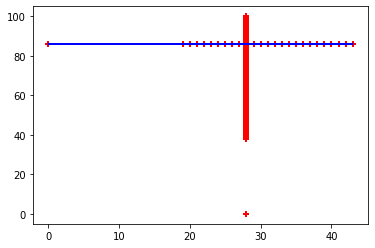

In [ ]:

plt.scatter(idf.left_temp_hum_04.temp_value,idf.left_temp_hum_04.humidity_value, color="red" , marker='+')
plt.plot(idf.left_temp_hum_04.temp_value,model_logic.predict(idf.left_temp_hum_04[["temp_value"]]), color='blue')

In [ ]:
fig = px.scatter( x=idf.left_temp_hum_04.temp_value, y=idf.left_temp_hum_04.humidity_value, trendline="ols",trendline_color_override='green')
fig.show()

**so Logistic Regression is more appreciative**

## Decision tree

In [ ]:
from sklearn import tree
model_decision=tree.DecisionTreeClassifier()

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,None]
             }

clf = RandomizedSearchCV(estimator = model_decision, param_distributions = parameters, cv = 5)
clf.fit(x_train, y_train)   # x_train,y_train

# summarize results
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))

Best: 0.876349 using {'max_depth': 5, 'criterion': 'gini'}


In [ ]:
def decision_func(crit,max_dep,temp):
  decision_model=tree.DecisionTreeClassifier(criterion=crit,max_depth=max_dep)
  decision_model.fit(x_train,y_train)
  y_pred=decision_model.predict(x_test)
  hum_temp=decision_model.predict(temp)
  print("the prediction-accuracy is :{}".format(accuracy_score(y_pred,y_test)))
  print('the humidity is :{}'.format(hum_temp))
  return decision_model

In [ ]:
firstx=decision_func('entropy',6,[[40]])

the prediction-accuracy is :0.876426083823706
the humidity is :[86.]


In [ ]:
model_decision.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
model_decision.predict([[43]])

array([86.])

In [ ]:
model_decision.score(x_test,y_test)

0.8773868139786237

## SVM

In [ ]:
from sklearn.svm import SVC
model_svm= SVC()

In [ ]:
model_svm.fit(x_train,y_train)

SVC()

In [ ]:
model_svm.predict([[47]])

array([86.])

In [ ]:
model_svm.score(x_test,y_test)

0.8773868139786237